In [2]:
import cobra

In [3]:
from cobra import Model, Reaction, Metabolite

In [4]:
import mewpy

In [5]:
from mewpy.simulation import SimulationMethod

In [6]:
from mewpy.optimization.evaluation import BPCY,WYIELD

In [7]:
from mewpy.problems import GOUProblem

In [8]:
cd "C:\Users\Asus\Desktop\Bioinformática\2º Semestre\Projeto de Bioinformática e Biologia de Sistemas"

C:\Users\Asus\Desktop\Bioinformática\2º Semestre\Projeto de Bioinformática e Biologia de Sistemas


In [9]:
M_1_1 = cobra.io.read_sbml_model('iJN746.xml')

In [9]:
print('Number of reactions: ',len(M_1_1.reactions))
print('Number of metabolites: ',len(M_1_1.metabolites))
print('Number of genes: ',len(M_1_1.genes))

Number of reactions:  1054
Number of metabolites:  907
Number of genes:  746


### Objective function and biomass flux in the wild type 

In [10]:
objective2 = M_1_1.problem.Objective(
    M_1_1.reactions.BIOMASS_KT_TEMP.flux_expression,
    direction = 'max')

In [11]:
M_1_1.objective = objective2

In [12]:
M_1_1.objective.expression

1.0*BIOMASS_KT_TEMP - 1.0*BIOMASS_KT_TEMP_reverse_d18f7

In [13]:
M_1_1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
fe2_e,EX_fe2_e,0.0014,0,0.00%
glc__D_e,EX_glc__D_e,8.262,6,87.72%
nh4_e,EX_nh4_e,14.44,0,0.00%
o2_e,EX_o2_e,4.065,0,0.00%
pi_e,EX_pi_e,1.072,0,0.00%
so4_e,EX_so4_e,0.3263,0,0.00%
mhpglu_c,SK_5mthglu_c,0.2744,25,12.14%
dna5mtc_c,SK_dna5mtc_c,0.007,11,0.14%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-2.919,1,28.15%


### Pathway insertion

####  dTDP-L-rhamnose pathway

##### Reaction 2: D-glucose-1-phosphate -> dTDP-d-glucose

In [14]:
reaction2 = Reaction('d_glucose')
reaction2.name = 'r_d_glucose'
reaction2.lower_bound = 0.
reaction2.upper_bound = 1000.0

dglu = Metabolite(
      'dtdpglu',
      formula = 'C16H24N2O16P2',
      name = 'dTDP-d-glucose',
      compartment = 'c')


reaction2.add_metabolites({
    M_1_1.metabolites.dttp_c:-1.0,
    M_1_1.metabolites.g1p_c:-1.0,
    M_1_1.metabolites.h_c:-1.0,
    dglu:1.0,
    M_1_1.metabolites.ppi_c:1.0})

reaction2.gene_reaction_rule= 'RmlA'

reaction2.reaction

'dttp_c + g1p_c + h_c --> dtdpglu + ppi_c'

In [15]:
M_1_1.add_reaction(reaction2)
M_1_1.reactions.d_glucose

Reaction identifier,d_glucose
Name,r_d_glucose
Memory address,0x2a351787820
Stoichiometry,dttp_c + g1p_c + h_c --> dtdpglu + ppi_c DTTP C10H13N2O14P3 + D-Glucose 1-phosphate + H+ --> dTDP-d-glucose + Diphosphate
GPR,RmlA
Lower bound,0.0
Upper bound,1000.0


##### Reaction 3: dTDP-d-glucose -> 4,6-Dideoxy-4-oxo-dTDP-D-glucose

In [16]:
reaction3 = Reaction('dioxiglucose')
reaction3.name = 'r_4,6-Dideoxy-4-oxo-dTDP-D-glucose'
reaction3.lower_bound = 0.
reaction3.upper_bound = 1000.0

dioxoglu = Metabolite(
      'dioxoglu',
      formula = 'C16H24N2O15P2',
      name = '4,6-Dideoxy-4-oxo-dTDP-D-glucose',
      compartment = 'c')


reaction3.add_metabolites({
    M_1_1.metabolites.dtdpglu:-1.0,
    dioxoglu:1.0,
    M_1_1.metabolites.h2o_c:1.0})

reaction3.gene_reaction_rule= 'RmlB'

reaction3.reaction

'dtdpglu --> dioxoglu + h2o_c'

In [17]:
M_1_1.add_reaction(reaction3)
M_1_1.reactions.dioxiglucose

Reaction identifier,dioxiglucose
Name,"r_4,6-Dideoxy-4-oxo-dTDP-D-glucose"
Memory address,0x2a35178a130
Stoichiometry,"dtdpglu --> dioxoglu + h2o_c dTDP-d-glucose --> 4,6-Dideoxy-4-oxo-dTDP-D-glucose + H2O H2O"
GPR,RmlB
Lower bound,0.0
Upper bound,1000.0


##### Reaction 4: 4,6-Dideoxy-4-oxo-dTDP-D-glucose -> dTDP-4-oxo-5-C-methyl-L-rhamnose

In [18]:
reaction4 = Reaction('oxorhamnose')
reaction4.name = 'r_dTDP-4-oxo-5-C-methyl-L-rhamnose'
reaction4.lower_bound = 0.
reaction4.upper_bound = 1000.0

oxormn = Metabolite(
      'oxormn',
      formula = 'C17H26N2O15P2',
      name = 'dTDP-4-oxo-5-C-methyl-L-rhamnose',
      compartment = 'c')


reaction4.add_metabolites({
    M_1_1.metabolites.dioxoglu:-1.0,
    oxormn:1.0})

reaction4.gene_reaction_rule= 'RmlC'

reaction4.reaction

'dioxoglu --> oxormn'

In [19]:
M_1_1.add_reaction(reaction4)
M_1_1.reactions.oxorhamnose

Reaction identifier,oxorhamnose
Name,r_dTDP-4-oxo-5-C-methyl-L-rhamnose
Memory address,0x2a3517874f0
Stoichiometry,"dioxoglu --> oxormn 4,6-Dideoxy-4-oxo-dTDP-D-glucose --> dTDP-4-oxo-5-C-methyl-L-rhamnose"
GPR,RmlC
Lower bound,0.0
Upper bound,1000.0


##### Reaction 5: dTDP-4-oxo-5-C-methyl-L-rhamnose -> dDTP-L-rhamnose

In [20]:
reaction5 = Reaction('rhamnose')
reaction5.name = 'r_dDTP-L-rhamnose'
reaction5.lower_bound = 0.
reaction5.upper_bound = 1000.0

dtdprmn = Metabolite(
      'dtdprmn',
      formula = 'C16H24N2O15P2',
      name = 'dDTP-L-rhamnose',
      compartment = 'c')


reaction5.add_metabolites({
    M_1_1.metabolites.h_c:-1.0,
    M_1_1.metabolites.nadph_c:-1.0,
    M_1_1.metabolites.oxormn:-1.0,
    dtdprmn:1.0,
    M_1_1.metabolites.nadp_c:1.0})

reaction5.gene_reaction_rule= 'RmlD'

reaction5.reaction

'h_c + nadph_c + oxormn --> dtdprmn + nadp_c'

In [21]:
M_1_1.add_reaction(reaction5)
M_1_1.reactions.rhamnose

Reaction identifier,rhamnose
Name,r_dDTP-L-rhamnose
Memory address,0x2a35174bcd0
Stoichiometry,h_c + nadph_c + oxormn --> dtdprmn + nadp_c H+ + Nicotinamide adenine dinucleotide phosphate - reduced + dTDP-4-oxo-5-C-methyl-L-rhamnose --> dDTP-L-rhamnose + Nicotinamide adenine dinucleotide phosphate
GPR,RmlD
Lower bound,0.0
Upper bound,1000.0


In [22]:
print('Number of reactions: ',len(M_1_1.reactions))
print('Number of metabolites: ',len(M_1_1.metabolites))
print('Number of genes: ',len(M_1_1.genes))

Number of reactions:  1058
Number of metabolites:  911
Number of genes:  750


#### β-D-(β-D-hydroxyalkanoyloxy)alkanoic acid (HAA) pathway

##### Reaction 6: Acetyl-CoA -> Malonyl-CoA

In [23]:
reaction6 = Reaction('MalonylCoA')
reaction6.name = 'r_MalonylCoA'
reaction6.lower_bound = 0.
reaction6.upper_bound = 1000.

malcoame = Metabolite(
      'malcoame',
      formula = 'C25H36N7O19P3S',
      name = 'Malonyl-CoA',
      compartment = 'c')


reaction6.add_metabolites({
    M_1_1.metabolites.accoa_c:-1.0,
    malcoame:1.0})

reaction6.gene_reaction_rule= 'ACCC'

reaction6.reaction

'accoa_c --> malcoame'

In [24]:
M_1_1.add_reaction(reaction6)
M_1_1.reactions.MalonylCoA

Reaction identifier,MalonylCoA
Name,r_MalonylCoA
Memory address,0x2a35174b7c0
Stoichiometry,accoa_c --> malcoame Acetyl-CoA --> Malonyl-CoA
GPR,ACCC
Lower bound,0.0
Upper bound,1000.0


##### Reaction 7: Malonyl-CoA -> Malonyl-ACP 

In [25]:
reaction7 = Reaction('MalonylACP')
reaction7.name = 'r_Malonyl-ACP'
reaction7.lower_bound = 0.
reaction7.upper_bound = 1000.

malmeACP = Metabolite(
      'malmeACP',
      formula = 'C15H25N2O10PRS',
      name = 'Malonyl-ACP',
      compartment = 'c')


reaction7.add_metabolites({
    M_1_1.metabolites.malcoame:-1.0,
    malmeACP:1.0})

reaction7.gene_reaction_rule= 'FabD'

reaction7.reaction

'malcoame --> malmeACP'

In [26]:
M_1_1.add_reaction(reaction7)
M_1_1.reactions.MalonylACP

Reaction identifier,MalonylACP
Name,r_Malonyl-ACP
Memory address,0x2a3517a1f70
Stoichiometry,malcoame --> malmeACP Malonyl-CoA --> Malonyl-ACP
GPR,FabD
Lower bound,0.0
Upper bound,1000.0


##### Reaction 8: Malonyl-ACP -> β-ketoacyl-ACP

In [27]:
reaction8 = Reaction('ketoacylACP')
reaction8.name = 'r_ketoacyl-ACP'
reaction8.lower_bound = 0.
reaction8.upper_bound = 1000.

reaction8.add_metabolites({
    M_1_1.metabolites.malmeACP:-1.0,
    M_1_1.metabolites.actACP_c:1.0})

reaction8.gene_reaction_rule= 'FabB'

reaction8.reaction

'malmeACP --> actACP_c'

In [28]:
M_1_1.add_reaction(reaction8)
M_1_1.reactions.ketoacylACP

Reaction identifier,ketoacylACP
Name,r_ketoacyl-ACP
Memory address,0x2a3517a1fa0
Stoichiometry,malmeACP --> actACP_c Malonyl-ACP --> Acetoacetyl-ACP
GPR,FabB
Lower bound,0.0
Upper bound,1000.0


##### Reaction 9: β-ketoacyl-ACP -> β-hydroxyacyl-ACP

In [29]:
reaction9 = Reaction('hydroxyacylACP')
reaction9.name = 'r_hydroxyacyl-ACP'
reaction9.lower_bound = 0.
reaction9.upper_bound = 1000.

hyacyACP = Metabolite(
      'hyacyACP',
      formula = 'C10H17O2S',
      name = 'β-hydroxyacyl-ACP',
      compartment = 'c')


reaction9.add_metabolites({
    M_1_1.metabolites.actACP_c:-1.0,
    hyacyACP:1.0})

reaction9.gene_reaction_rule= 'FabG'

reaction9.reaction

'actACP_c --> hyacyACP'

In [30]:
M_1_1.add_reaction(reaction9)
M_1_1.reactions.hydroxyacylACP

Reaction identifier,hydroxyacylACP
Name,r_hydroxyacyl-ACP
Memory address,0x2a3517870d0
Stoichiometry,actACP_c --> hyacyACP Acetoacetyl-ACP --> β-hydroxyacyl-ACP
GPR,FabG
Lower bound,0.0
Upper bound,1000.0


##### Reaction 10: β-hydroxyacyl-ACP -> β-D-(β-D-hydroxyalkanoyloxy)alkanoic acid (HAA)

In [31]:
reaction10 = Reaction('HAA')
reaction10.name = 'r_HAA'
reaction10.lower_bound = 0.
reaction10.upper_bound = 1000.

HAA = Metabolite(
      'HAA',
      formula = 'C20H34O5',
      name = 'β-D-(β-D-hydroxyalkanoyloxy)alkanoic acid ',
      compartment = 'c')


reaction10.add_metabolites({
    M_1_1.metabolites.hyacyACP:-1.0,
    HAA:1.0})

reaction10.gene_reaction_rule= 'RhlA'

reaction10.reaction

'hyacyACP --> HAA'

In [32]:
M_1_1.add_reaction(reaction10)
M_1_1.reactions.HAA

Reaction identifier,HAA
Name,r_HAA
Memory address,0x2a3517870a0
Stoichiometry,hyacyACP --> HAA β-hydroxyacyl-ACP --> β-D-(β-D-hydroxyalkanoyloxy)alkanoic acid
GPR,RhlA
Lower bound,0.0
Upper bound,1000.0


In [33]:
print('Number of reactions: ',len(M_1_1.reactions))
print('Number of metabolites: ',len(M_1_1.metabolites))
print('Number of genes: ',len(M_1_1.genes))

Number of reactions:  1063
Number of metabolites:  915
Number of genes:  755


####  Ramnhose and HAA drain reactions

In [34]:
ChorDrain1 = Reaction('R_EX_rhamnose')
ChorDrain1.name = 'rhamnose exchange' 
ChorDrain1.lower_bound = 0.
ChorDrain1.upper_bound = 1000.

In [35]:
ChorDrain1.add_metabolites({
    M_1_1.metabolites.dtdprmn: -1.0,

})

In [36]:
ChorDrain1.reaction

'dtdprmn --> '

In [37]:
M_1_1.add_reactions([ChorDrain1])

In [38]:
ChorDrain2 = Reaction('R_EX_HAA')
ChorDrain2.name = 'HAA exchange' 
ChorDrain2.lower_bound = 0.
ChorDrain2.upper_bound = 1000.

In [39]:
ChorDrain2.add_metabolites({
    M_1_1.metabolites.HAA: -1.0,

})

In [40]:
ChorDrain2.reaction

'HAA --> '

In [41]:
M_1_1.add_reactions([ChorDrain2])

#### Save the  XML file with the new reactions

In [55]:
import tempfile
from pprint import pprint
from cobra.io import write_sbml_model, validate_sbml_model
with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
    write_sbml_model(M_1_1 , 'iJN746_metabolitosrascunho.xml')
    report = validate_sbml_model('iJN746_metabolitosrascunho.xml')
pprint(report)

(<Model iJN746 at 0x26e34b63f70>,
 {'COBRA_CHECK': [],
  'COBRA_ERROR': [],
  'COBRA_FATAL': [],
  'COBRA_WARNING': [],
  'SBML_ERROR': [],
  'SBML_FATAL': [],
  'SBML_SCHEMA_ERROR': [],
  'SBML_WARNING': []})


In [56]:
cobra.io.write_sbml_model(M_1_1,'iJN746_metabolitosrascunho.xml')

### Objective function and flux of rhamnose product 

In [42]:
objective1 = M_1_1.problem.Objective(
    M_1_1.reactions.R_EX_rhamnose.flux_expression, 
    direction = 'max')

In [43]:
M_1_1.objective = objective1

In [44]:
M_1_1.objective.expression

1.0*R_EX_rhamnose - 1.0*R_EX_rhamnose_reverse_1411e

In [45]:
M_1_1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
fe2_e,EX_fe2_e,0.001,0,0.00%
glc__D_e,EX_glc__D_e,20,6,96.03%
nh4_e,EX_nh4_e,20.91,0,0.00%
o2_e,EX_o2_e,2.833,0,0.00%
pi_e,EX_pi_e,11.36,0,0.00%
so4_e,EX_so4_e,0.2331,0,0.00%
mhpglu_c,SK_5mthglu_c,0.196,25,3.92%
dna5mtc_c,SK_dna5mtc_c,0.005,11,0.04%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-2.039,1,2.22%


### Simulations

In [46]:
from mewpy.simulation import get_simulator
simul = get_simulator(M_1_1)

In [47]:
pfba_solution = cobra.flux_analysis.pfba(M_1_1)
pfba_solution

,fluxes,reduced_costs
EX_gly_e,0.000000e+00,26.5
3OAR141,6.000000e-03,-2.0
EX_glyald_e,0.000000e+00,40.0
3OAR160,4.000000e-03,-2.0
3OAR161,6.000000e-03,-2.0
...,...,...
ketoacylACP,0.000000e+00,-2.0
hydroxyacylACP,-3.469447e-18,-2.0
HAA,-3.469447e-18,-2.0
R_EX_rhamnose,5.296127e+00,-2.0


In [48]:
result = simul.simulate(method='pFBA')

result

objective: 1179.5325115681806
Status: OPTIMAL
Constraints: OrderedDict()
Method:pFBA

In [49]:
constraints = {'BIOMASS_KT_TEMP': (0.14, 1000)}

# run a pFBA simulation accounting with the new constraint
result = simul.simulate(method='pFBA',constraints=constraints)

result.fluxes['BIOMASS_KT_TEMP']

0.14

In [50]:
result

objective: 981.3070972940942
Status: OPTIMAL
Constraints: OrderedDict([('BIOMASS_KT_TEMP', (0.14, 1000))])
Method:pFBA

### BCPY simulations to maximize the ramnhose production 

#### RKO problem (Reaction Constraint Problems)

In [42]:
# Define the target
PRODUCT_ID = 'R_EX_rhamnose'
BIOMASS_ID = 'BIOMASS_KT_TEMP'

# environmental conditions
envcond = {'BIOMASS_KT_TEMP': (0.14, 1000)}

# Optimization objectives

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method='pFBA')
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

# build a new reaction deletion problem instance
from mewpy.problems import RKOProblem

problem = RKOProblem(M_1_1, 
               fevaluation=[evaluator_1, evaluator_2], 
               envcond=envcond)



#### Values for max_generations = 50

Building modification target list.
Computing essential reactions:


  0%|          | 0/1065 [00:00<?, ?it/s]C:\Users\Asus\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
100%|██████████| 1065/1065 [00:42<00:00, 25.16it/s]


Running NSGAII


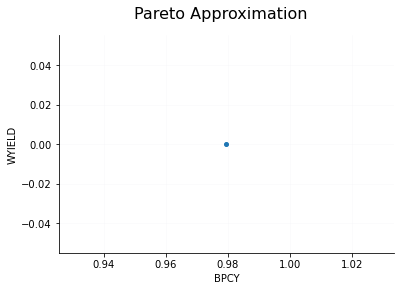

In [52]:
from mewpy.problems import RKOProblem

problem0 = RKOProblem(M_1_1, 
               fevaluation=[evaluator_1, evaluator_2], 
               envcond=envcond)

from mewpy.optimization import EA

ea0 = EA(problem0, max_generations= 50, visualizer=True)
final_pop9 = ea0.run()

In [54]:
from mewpy.util.io import population_to_csv
population_to_csv(problem0,final_pop9,'resultsRKOpfba50rascunho.csv')

In [53]:
final_pop9[0:200]

[[0.9795426121939397, 0.0];{'PSD180': 0, 'PSSA181': 0}]

####  ROU problem (reaction over- or under expression optimization)

In [57]:
# build a new reaction over/under expression problem instance
PRODUCT_ID = 'R_EX_rhamnose'
BIOMASS_ID = 'BIOMASS_KT_TEMP'

# environmental conditions
envcond = {'BIOMASS_KT_TEMP': (0.14, 1000)}

# Optimization objectives

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method='pFBA')
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)
from mewpy.problems import ROUProblem

from mewpy.optimization import EA
problem1 = ROUProblem(M_1_1, 
               fevaluation=[evaluator_1, evaluator_2], 
               envcond=envcond)


#### Values for max_generations = 50

Building modification target list.
Running NSGAII


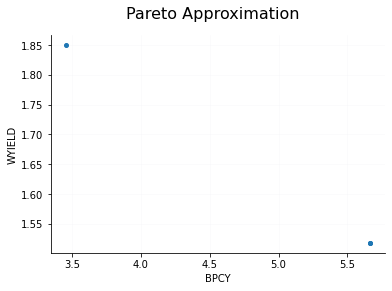

In [58]:
ea5 = EA(problem1, max_generations= 50, visualizer=True)
final_pop5 = ea5.run()

In [59]:
# Save the solutions to a csv file
from mewpy.util.io import population_to_csv
population_to_csv(problem1,final_pop5,'resultsROUpfba50rascunho.csv')

In [60]:
final_pop5[0:50]

[[3.45286545570908, 1.849749351272727];{'DHNPA': 4},
 [6.373120018618179, 0.8535428596363613];{'EAR141y': 16},
 [5.666007277381812, 1.5176805207272708];{'G1SAT': 8},
 [5.66600727737812, 1.5176805207284256];{'QULNS': 8},
 [5.666007277381804, 1.5176805207272706];{'GLCNt2rpp': 16, 'SUCCt2_2pp': 0, 'EAR141y': 8, 'G1SAT': 8, 'PDX5POi': 0.5},
 [5.666007277381804, 1.5176805207272706];{'EX_val__L_e': 16, 'SUCCt2_2pp': 0, 'EAR141y': 8, 'G1SAT': 8, 'PDX5POi': 0.5},
 [5.666007277381804, 1.5176805207272706];{'EX_val__L_e': 16, 'GLCNt2rpp': 16, 'EAR141y': 8, 'G1SAT': 8, 'PDX5POi': 0.5},
 [5.666007277381804, 1.5176805207272706];{'EX_val__L_e': 16, 'GLCNt2rpp': 16, 'SUCCt2_2pp': 0, 'G1SAT': 8, 'PDX5POi': 0.5},
 [5.666007277381804, 1.5176805207272706];{'EX_val__L_e': 16, 'GLCNt2rpp': 16, 'SUCCt2_2pp': 0, 'EAR141y': 8, 'PDX5POi': 0.5},
 [5.666007277381804, 1.5176805207272706];{'EX_val__L_e': 16, 'GLCNt2rpp': 16, 'SUCCt2_2pp': 0, 'EAR141y': 8, 'G1SAT': 8},
 [5.66600727738181, 1.5176805207272732];{'DASYN

#### GKO problem (Gene Constraint Problems)

In [61]:
# build a new reaction over/under expression problem instance
PRODUCT_ID = 'R_EX_rhamnose'
BIOMASS_ID = 'BIOMASS_KT_TEMP'

# environmental conditions
envcond = {'BIOMASS_KT_TEMP': (0.14, 1000)}

# Optimization objectives
evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method='pFBA')
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)


#### Values for max_generations = 50

In [62]:
from mewpy.problems import GKOProblem
problem7 = GKOProblem(M_1_1, fevaluation=[
                         evaluator_1, evaluator_2], envcond=envcond)

Building modification target list.
Computing essential genes:


  0%|          | 2/755 [00:01<06:46,  1.85it/s]C:\Users\Asus\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
100%|██████████| 755/755 [05:28<00:00,  2.30it/s]


Running NSGAII


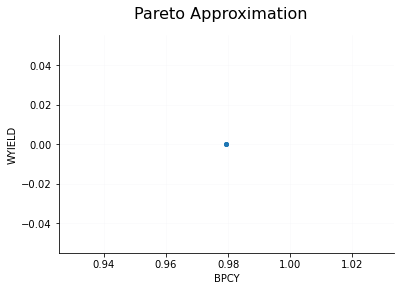

In [63]:
from mewpy.optimization import EA
ea7 = EA(problem7, max_generations= 50, visualizer=True)
final_pop7 = ea7.run()

In [64]:
from mewpy.util.io import population_to_csv

population_to_csv(problem7,final_pop7,'resultsGKOpfba50rascunho.csv')

#### GOU problem (gene over- or under expression optimization)

In [43]:
# build a new reaction over/under expression problem instance
PRODUCT_ID = 'R_EX_rhamnose'
BIOMASS_ID = 'BIOMASS_KT_TEMP'

# environmental conditions
envcond = {'BIOMASS_KT_TEMP': (0.14, 1000)}

# Optimization objectives
evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = 'pFBA')
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)


#### Values for max_generations = 50

In [44]:
# build a new problem instance - gene over- or under expression optimization
from mewpy.problems import GOUProblem
problem4 = GOUProblem(M_1_1, fevaluation=[
                         evaluator_1, evaluator_2], envcond=envcond)

Running NSGAII


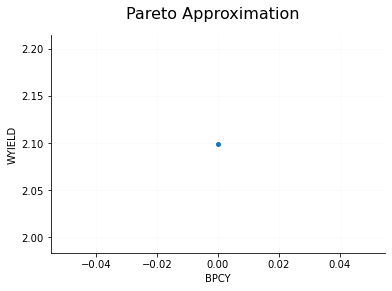

In [ ]:
from mewpy.optimization import EA
ea4 = EA(problem4, max_generations = 50, mp = True, visualizer=True)
final_pop4 = ea4.run()

In [49]:
from mewpy.util.io import population_to_csv

population_to_csv(problem4,final_pop4,'resultsGOUpfba50rascunho.csv')

In [48]:
final_pop4[0:280]

[[6.562179339271493, 4.995877122537803];{'PP_1620': 0.5, 'PP_1086': 4},
 [6.55472056691787, 4.996329146947396];{'PP_1620': 0.5, 'PP_1086': 4, 'PP_3745': 0.125},
 [6.562179339271493, 4.114131306019742];{'PP_1086': 4, 'PP_5286': 32}]